In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
origin = "lower"
delta = 0.025

x, y = np.meshgrid(np.arange(-3.0, 3.01, delta), np.arange(-3.0, 3.01, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

In [3]:
nr, nc = z.shape

# put NaNs in one corner:
z[-nr // 6:, -nc // 6:] = np.nan
# contourf will convert these to masked

z = np.ma.array(z)
# mask another corner:
z[:nr // 6, :nc // 6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt(x ** 2 + y ** 2) < 0.5
z[interior] = np.ma.masked

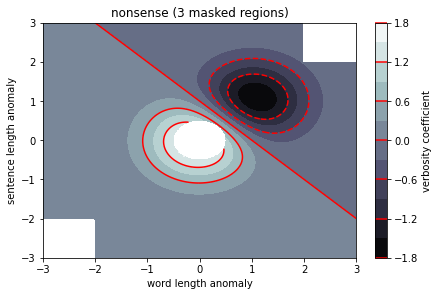

In [4]:
# automatic contour levels
fig1, ax2 = plt.subplots(constrained_layout=True)

cs1 = ax2.contourf(x, y, z, 10, cmap=plt.cm.bone, origin=origin)

# Note that in the following, we explicitly pass in a subset of the contour levels used for the filled contours.
# Alternatively, we could pass in additional levels to provide extra resolution,
# or leave out the *levels* keyword argument to use all of the original levels.
cs2 = ax2.contour(cs1, levels=cs1.levels[::2], colors="r", origin=origin)

ax2.set_title("nonsense (3 masked regions)")
ax2.set_xlabel("word length anomaly")
ax2.set_ylabel("sentence length anomaly")

# make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(cs1)
cbar.ax.set_ylabel("verbosity coefficient")

# add the contour line levels to the colorbar
cbar.add_lines(cs2)

plt.show()

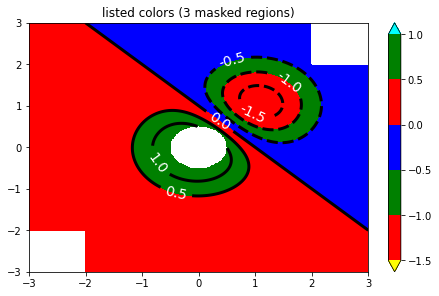

In [5]:
# explicit contour levels
fig2, ax2 = plt.subplots(constrained_layout=True)

levels = [-1.5, -1, -0.5, 0, 0.5, 1]
cs3 = ax2.contourf(x, y, z, levels, colors=("r", "g", "b"), origin=origin, extend="both")

# our data range extends outside the range of levels;
# make data below the lowest contour level yellow,
# and above the highest level cyan:
cs3.cmap.set_under("yellow")
cs3.cmap.set_over("cyan")

cs4 = ax2.contour(x, y, z, levels, colors=("k", ), linewidths=(3, ), origin=origin)

ax2.set_title("listed colors (3 masked regions)")
ax2.clabel(cs4, fmt="%2.1f", colors="w", fontsize=14)

# notice that the colorbar gets all the information it needs from the ContourSet object, CS3
fig2.colorbar(cs3)
plt.show()

In [6]:
# extension settings
extends = ["neither", "both", "min", "max"]
cmap = plt.colormaps["winter"].with_extremes(under="magenta", over="yellow")

# note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

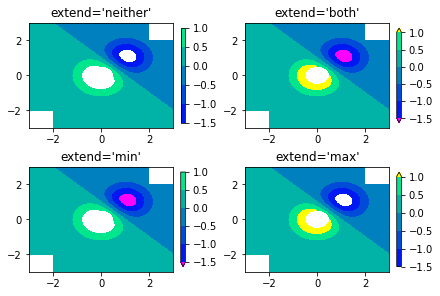

In [7]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)

for ax, extend in zip(axs.flat, extends):
    cs = ax.contourf(x, y, z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title(f"{extend=}")
    ax.locator_params(nbins=4)

plt.show()